In [ ]:
from transformers import AutoTokenizer
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
model_checkpoint = "C:\\Users\\Franco\\Desktop\\projetos\\bert-large-portuguese-cased"
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)
dataset = load_dataset("csv", data_files="data/train2024.csv", split="train", sep=";")

def get_length(example):
    tokens = tokenizer(example["review"], truncation=False, padding=False)
    return {"length": len(tokens["input_ids"])}

dataset_with_lengths = dataset.map(get_length)

long_reviews = dataset_with_lengths.filter(lambda x: x["length"] > 512)
print(f"Total reviews: {len(dataset)}")
print(f"Reviews over 512 tokens: {len(long_reviews)}")")

Total reviews: 4828
Reviews over 512 tokens: 0

--- Example of a long review ---


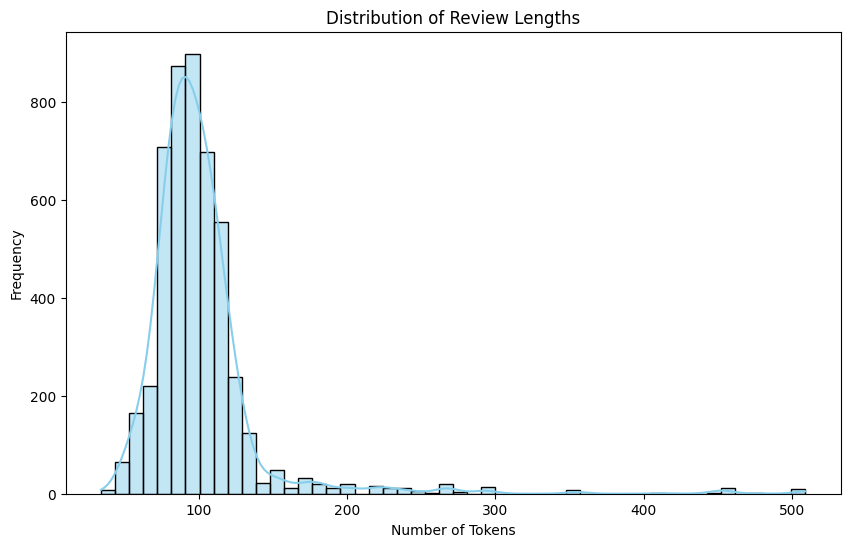

In [ ]:
lengths = [example['length'] for example in dataset_with_lengths]

plt.figure(figsize=(10, 6))

sns.histplot(lengths, kde=True, bins=50, color="skyblue", edgecolor="black")

plt.title("Distribution of Review Lengths")
plt.xlabel("Number of Tokens")
plt.ylabel("Frequency")

plt.show()

In [ ]:
lengths = dataset_with_lengths['length']
max_length = max(lengths)
max_length

509